# Scenerio Testing BHC Module

### Test Scenerios:

1) Simulated data clusters: Three component Gaussian mixture

2) Real data set presented in BHC paper: Glass data set

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy import linalg as la
from scipy import random as rnd
from scipy.special import gamma
import matplotlib.pyplot as plt
import bhc

### Data Sets

**Three component Gaussian mixture:**

In [2]:
# bivariate gaussian params
mu1 = np.zeros(2)
cov1 = np.eye(2)

mu2 = np.array([5, 3])
cov2 = np.eye(2) * 2

mu3 = np.array([8, 12])
cov3 = np.array([3.4, 0, 0, 5.1]).reshape(2, 2)

# multinom params
p1 = 0.3
p2 = 0.4
p3 = 1 - p2 - p1

# number of total draws
draws = 100

In [3]:
# random draws
rnd.seed(1)

knum = rnd.multinomial(draws, (p1, p2, p3))

gaus1 = rnd.multivariate_normal(mu1, cov1, knum[0])
gaus2 = rnd.multivariate_normal(mu2, cov2, knum[1])
gaus3 = rnd.multivariate_normal(mu3, cov3, knum[2])

# join columns into dataframe
x1 = pd.Series(np.r_[gaus1[:, 0], gaus2[:, 0], gaus3[:, 0]])
x2 = pd.Series(np.r_[gaus1[:, 1], gaus2[:, 1], gaus3[:, 1]])
c = pd.Series(np.r_[np.zeros(knum[0]), np.ones(knum[1]), np.ones(knum[2]) * 2])
dat = {"x1" : x1, "x2" : x2, "c" : c}
clustData = pd.DataFrame(dat)

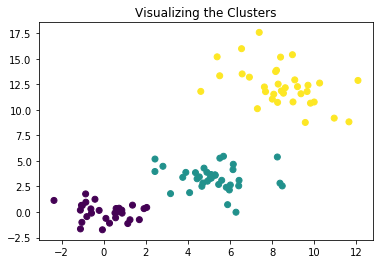

In [4]:
plt.scatter(clustData["x1"], clustData["x2"], c = clustData["c"])
plt.title("Visualizing the Clusters")
plt.show()

In [25]:
# priors distribution hyper-parameters
gcPriors = {
    "clusterConcentrationPrior" : {"alpha" : 100},
    "diffuseInvWishPrior" : {"df" : 2, "scale" : np.eye(2)}, # inv wishart params
    "diffuseNormPrior" : {"loc" : np.array([1,0]),
                          "scale" : np.eye(2),
                          "meanscale" : 1}, # mvtnormal params
}

In [26]:
gc = clustData.values[:, :2]
gctree = bhc.HierarchyTree(X = gc, allParams = gcPriors)

In [27]:
# still taking a while to grow w/ many pts
gctree.grow_tree()

In [28]:
# pre prunning tree summary
#gctree.tree_summary()
gctree.generate_clust_frame()

In [29]:
gctree.clustDF.head()

,Dim_0,Dim_1,clustnum
0,-0.802173,-0.448878,98.0
1,-1.105935,-1.654515,98.0
2,-2.363469,1.135345,98.0
3,-1.017014,0.637362,98.0
4,-0.859907,1.772608,98.0


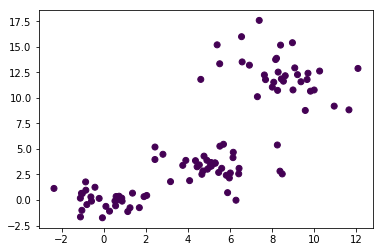

In [30]:
plt.scatter("Dim_0", "Dim_1", c = "clustnum", data=gctree.clustDF)
plt.show()

In [31]:
gctree.prune_tree()

In [32]:
gctree.generate_clust_frame()

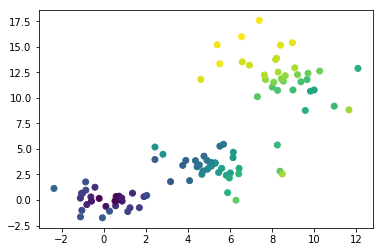

In [33]:
plt.scatter("Dim_0", "Dim_1", c = "clustnum", data=gctree.clustDF)
plt.show()

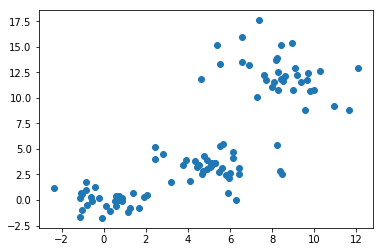

In [34]:
plt.scatter(gc[:, 0], gc[:, 1])
plt.show()

**Glass Data Set:**

In [15]:
glassurl = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
glasshead = ["ID", "RI", "Na", "Mg", "Al", "Si",
             "K", "Ca", "Ba", "Fe", "Type"]
glass = pd.read_csv(glassurl, names = glasshead, index_col = 0)
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
ID,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


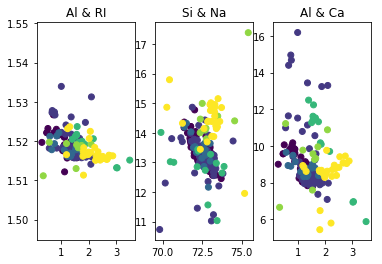

In [16]:
fig, ax = plt.subplots(ncols = 3)
ax[0].scatter(glass["Al"], glass["RI"], c = glass["Type"])
ax[0].set_title("Al & RI")
ax[1].scatter(glass["Si"], glass["Na"], c = glass["Type"])
ax[1].set_title("Si & Na")
ax[2].scatter(glass["Al"], glass["Ca"], c = glass["Type"])
ax[2].set_title("Al & Ca")
plt.show()

**Data Set 3**